<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_4_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from tqdm import tqdm
import sklearn.datasets as skds
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


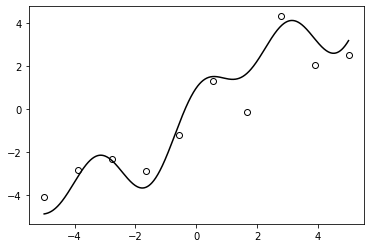

In [ ]:
fx = lambda x: torch.sin(x) + torch.cos(2*x) + x
X  = torch.linspace(-5, 5, 1000).resize(1000,1)
Y  = fx(X)

Xtrain = torch.linspace(-5, 5, 10).reshape(10, 1)
torch.manual_seed(1)
Ytrain = fx(Xtrain) + 1.2*torch.randn(size=Xtrain.size())

plt.plot(X, Y, color='black');
plt.scatter(Xtrain, Ytrain, color="white", edgecolor="black");

In [ ]:
polydegree = 6
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
features  = PolynomialFeatures(polydegree).fit_transform(Xtrain)
model     = LinearRegression().fit(features,Ytrain)
Xfeatures = PolynomialFeatures(polydegree).fit_transform(X)
Ymodel    = model.predict(Xfeatures)

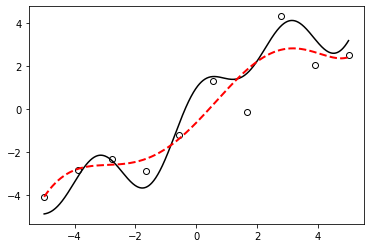

In [ ]:
def plot_regression(Ymodel):
  plt.plot(X, Y, color='black');
  plt.scatter(Xtrain, Ytrain, color="white", edgecolor="black")
  plt.plot(X, Ymodel, color='red', linestyle="dashed", linewidth=2);
plot_regression(Ymodel)

In [ ]:
model = nn.Sequential(nn.Linear(1,2),nn.ReLU(),
                      nn.Linear(2,2),nn.ReLU(),
                      nn.Linear(2,1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss      = nn.MSELoss()
for _ in range(100):
  optimizer.zero_grad()
  y_model = model(Xtrain)
  MSE_loss = loss(y_model, Ytrain) # =((y_model-Ytrain)**2).mean().mean()
  MSE_loss.backward()
  optimizer.step()  

In [ ]:
for _ in range(100):
  optimizer.zero_grad()
  y_model  = model(Xtrain)
  MSE_loss = ((y_model - Ytrain)**2).mean()
  MSE_loss.backward()
  optimizer.step()  

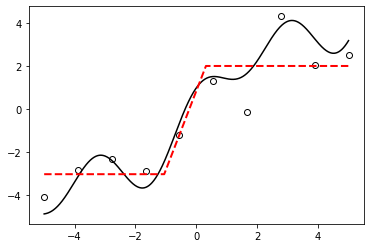

In [ ]:
plot_regression(model(X).detach())